# kaggle competition 2 
## 加载和浏览数据集
加载包

In [90]:
library(e1071)
library(caTools)
library(ROCR)
library(pROC)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




加载数据

In [65]:
Trainraw=read.csv("../../datas/kaggle_2_Train.csv")
Testraw=read.csv("../../datas/kaggle_2_Test.csv")
str(Testraw)

'data.frame':	300 obs. of  16 variables:
 $ Id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Team        : chr  "ARI" "ATL" "BAL" "BOS" ...
 $ League      : chr  "NL" "NL" "AL" "AL" ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ RS          : logi  NA NA NA NA NA NA ...
 $ RA          : logi  NA NA NA NA NA NA ...
 $ W           : logi  NA NA NA NA NA NA ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ Playoffs    : logi  NA NA NA NA NA NA ...
 $ RankSeason  : logi  NA NA NA NA NA NA ...
 $ RankPlayoffs: logi  NA NA NA NA NA NA ...
 $ G           : int  162 162 162 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.336 0.357 0.314 ...
 $ OSLG        : num  0.415 0.378 0.403 0.428 0.424 0.405 0.39 0

League与Team变量应该是Factor变量而非chr变量，下面作数据类型转换

In [5]:
Trainraw$League = as.factor(Trainraw$League )
Trainraw$Team = as.factor(Trainraw$Team)
str(Trainraw)

'data.frame':	932 obs. of  16 variables:
 $ Id          : int  301 302 303 304 305 306 307 308 309 310 ...
 $ Team        : Factor w/ 36 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ RS          : int  851 819 708 667 859 706 856 709 739 778 ...
 $ RA          : int  644 674 565 773 665 759 798 774 837 898 ...
 $ W           : int  99 98 101 67 93 67 81 78 74 73 ...
 $ OBP         : num  0.341 0.346 0.331 0.309 0.345 0.321 0.338 0.33 0.321 0.337 ...
 $ SLG         : num  0.433 0.423 0.409 0.403 0.444 0.413 0.449 0.408 0.412 0.423 ...
 $ BA          : num  0.282 0.267 0.26 0.246 0.277 0.246 0.268 0.253 0.249 0.274 ...
 $ Playoffs    : int  1 1 1 0 0 0 0 0 0 0 ...
 $ RankSeason  : int  3 4 2 NA NA NA NA NA NA NA ...
 $ RankPlayoffs: int  1 4 4 NA NA NA NA NA NA NA ...
 $ G           : int  162 162 161 162 162 162 162 162 162 162 ..

## 对数据变量做可视化分析

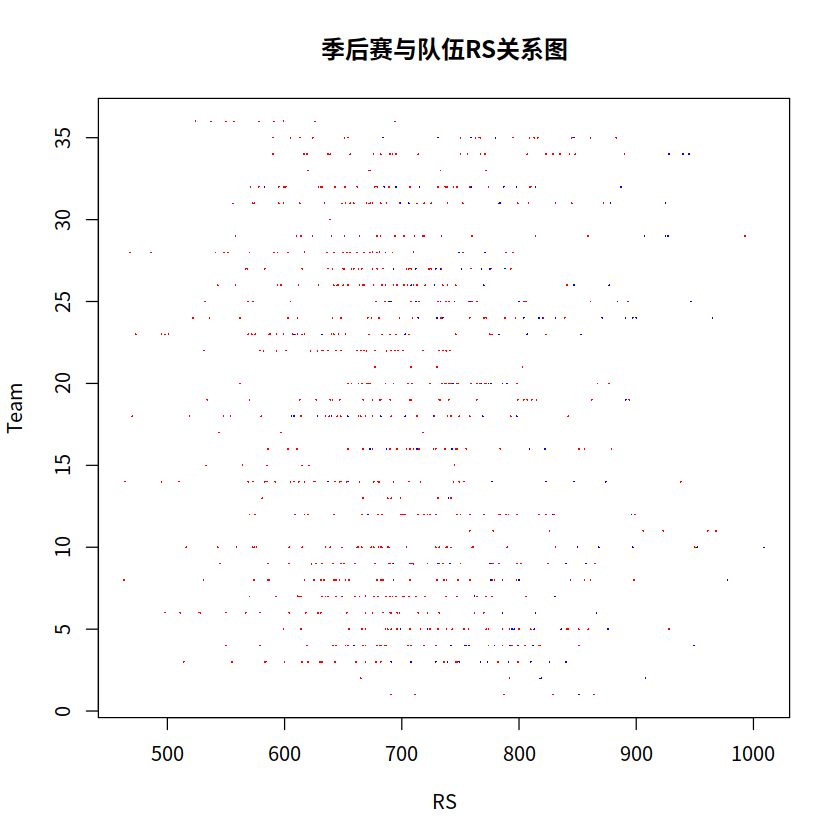

In [6]:
par=(pin=c(20,10))
with(Trainraw,
     plot(RS,Team,
          main="季后赛与队伍RS关系图",
          xlab="RS",ylab="Team",
          pch=16,
          col=ifelse(Playoffs=="1","blue","red"),
          cex=0.20
          ))

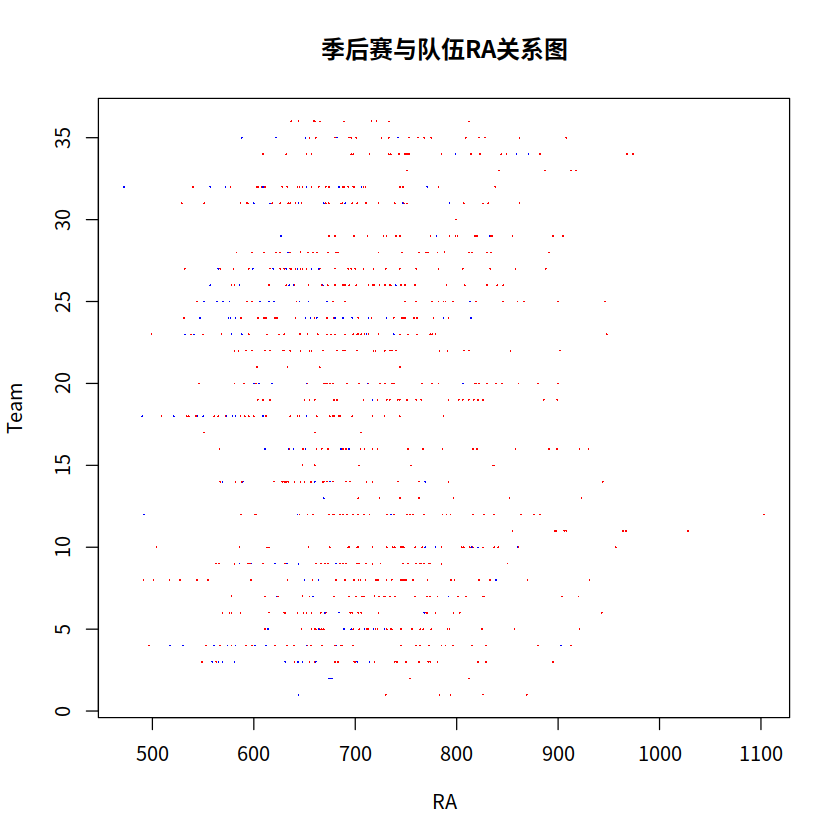

In [7]:
par=(pin=c(20,10))
with(Trainraw,
     plot(RA,Team,
          main="季后赛与队伍RA关系图",
          xlab="RA",ylab="Team",
          pch=16,
          col=ifelse(Playoffs=="1","blue","red"),
          cex=0.20
          ))

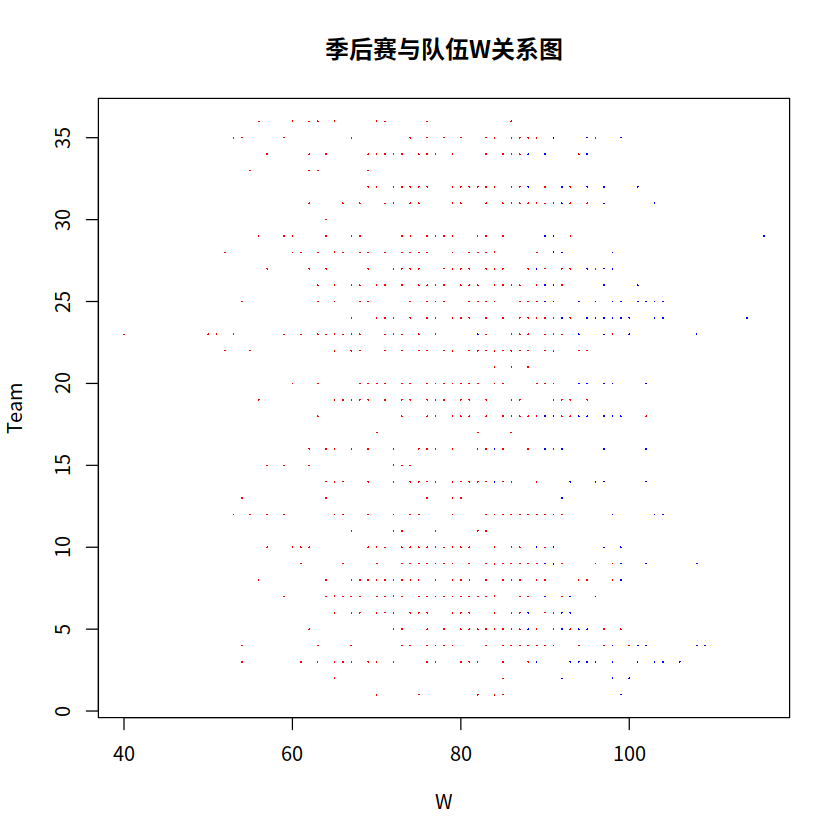

In [8]:
par=(pin=c(20,10))
with(Trainraw,
     plot(W,Team,
          main="季后赛与队伍W关系图",
          xlab="W",ylab="Team",
          pch=16,
          col=ifelse(Playoffs=="1","blue","red"),
          cex=0.20
          ))


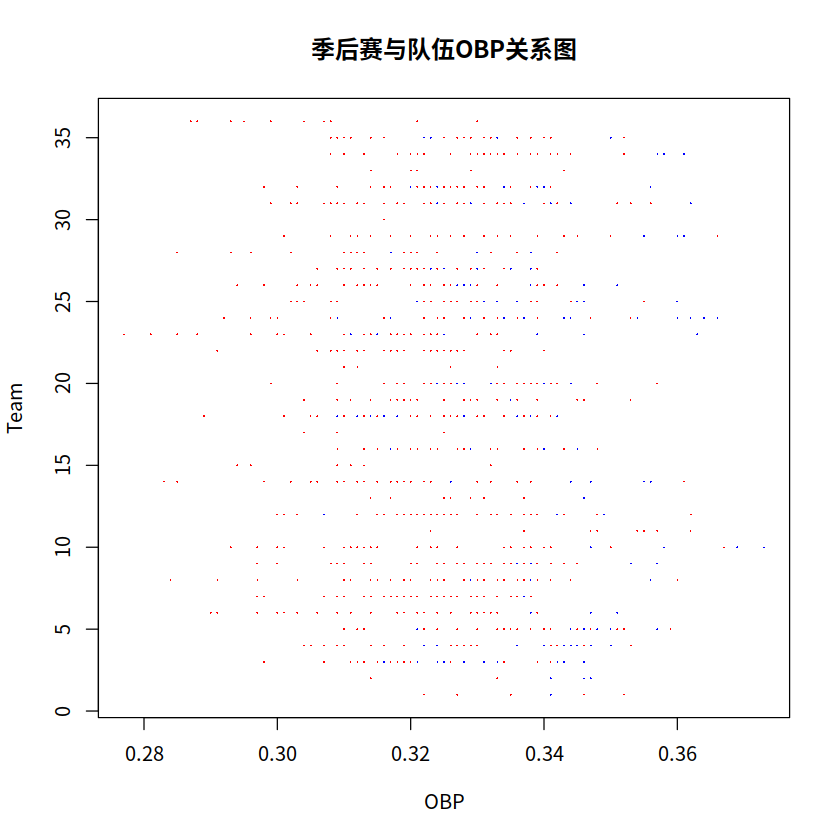

In [9]:
par=(pin=c(20,10))
with(Trainraw,
     plot(OBP,Team,
          main="季后赛与队伍OBP关系图",
          xlab="OBP",ylab="Team",
          pch=16,
          col=ifelse(Playoffs=="1","blue","red"),
          cex=0.20
          ))

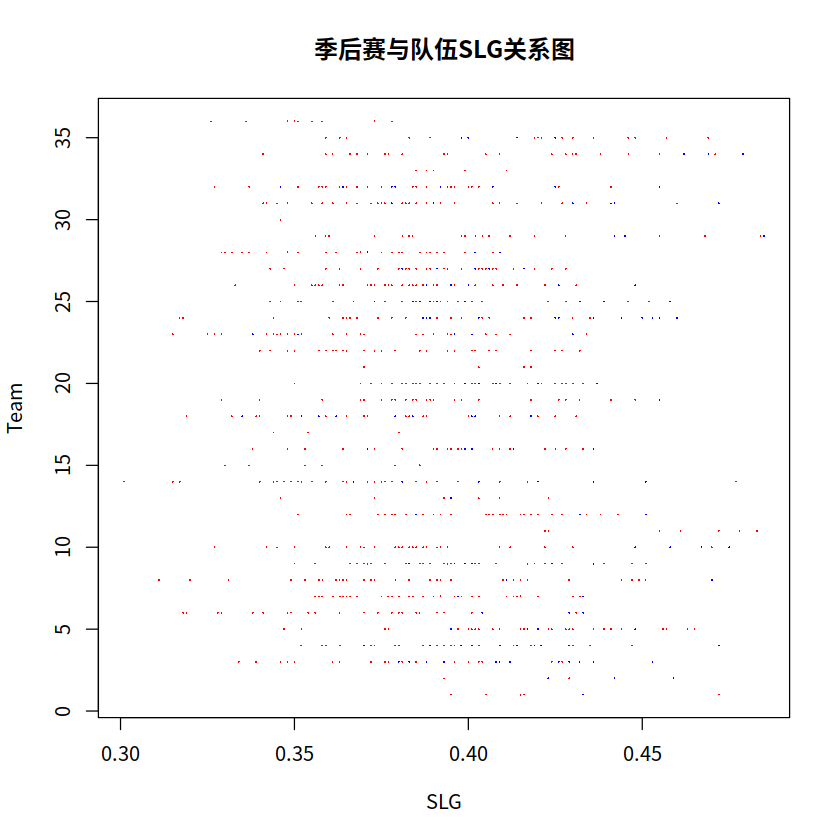

In [10]:
par=(pin=c(20,10))
with(Trainraw,
     plot(SLG,Team,
          main="季后赛与队伍SLG关系图",
          xlab="SLG",ylab="Team",
          pch=16,
          col=ifelse(Playoffs=="1","blue","red"),
          cex=0.20
          ))

分割数据集

In [11]:
set.seed(221)
split = sample.split(Trainraw$Playoffs, SplitRatio = 0.70)

In [12]:
MyTrain = subset(Trainraw, split == TRUE)
MyTest = subset(Trainraw, split == FALSE)

## 逻辑回归
### 仅使用 OBP+SLG 双变量

In [13]:
logis_train <- function(threhold){
  QualityLog = glm(Playoffs ~ OBP+SLG, data = MyTrain, family = binomial)
  predictTest = predict(QualityLog, type = "response", newdata = MyTest)
  output=table(MyTest$Playoffs, predictTest > threhold)
  error=(output[1,2]+output[2,1])/sum(output)
  return(error)
  }

In [14]:
logis_train(0.43)

[1] 0.1607143

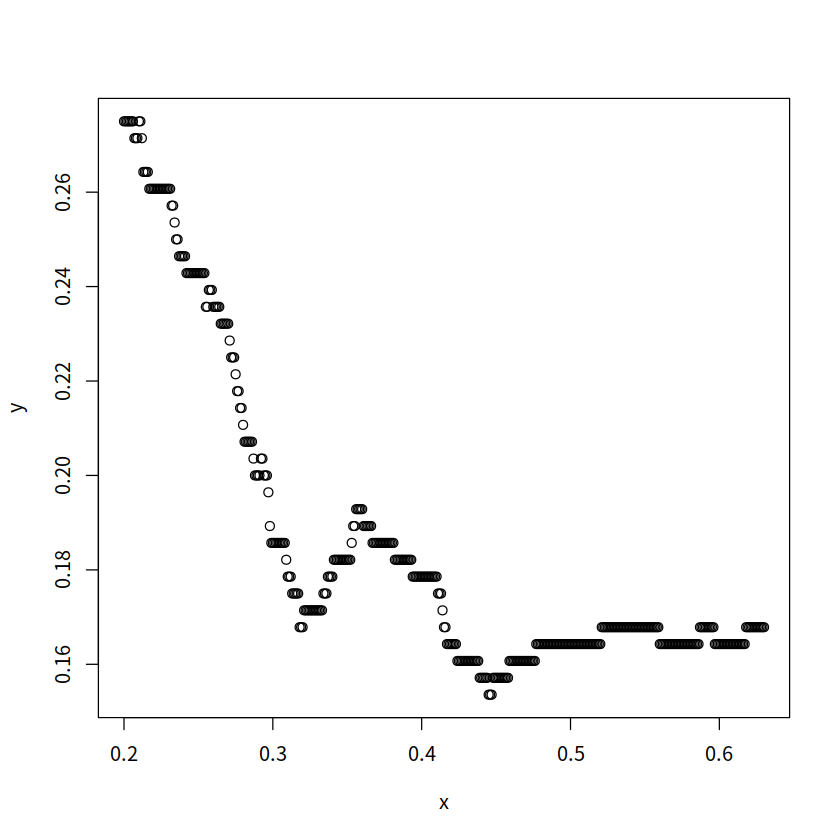

In [15]:
x= seq(from=0.2, to=0.63, by=0.001)
y=c()
k=1
for(i in x){
  y[k]=logis_train(i)
  k=k+1
  }
plot(x,y)

In [16]:
QualityLog = glm(Playoffs ~ OBP+SLG, data = MyTrain, family = binomial)
summary(QualityLog)


Call:
glm(formula = Playoffs ~ OBP + SLG, family = binomial, data = MyTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6764  -0.6211  -0.4316  -0.2571   2.7568  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -23.712      2.993  -7.922 2.33e-15 ***
OBP           59.969     12.778   4.693 2.69e-06 ***
SLG            5.965      5.418   1.101    0.271    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 601.28  on 651  degrees of freedom
Residual deviance: 513.48  on 649  degrees of freedom
AIC: 519.48

Number of Fisher Scoring iterations: 5


训练集验证及阈值筛选

In [17]:
PatoffTrain_1 = predict(QualityLog, type = "response")
summary(PatoffTrain_1)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005766 0.065951 0.129505 0.173313 0.234517 0.808772 

In [18]:
tapply(PatoffTrain_1, MyTrain$Playoffs, mean)

0         1 
0.1482190 0.2930085

In [19]:
conf05=table(MyTrain$Playoffs,PatoffTrain_1 > 0.5)
conf05

   
    FALSE TRUE
  0   526   13
  1    97   16

#### 画ROC

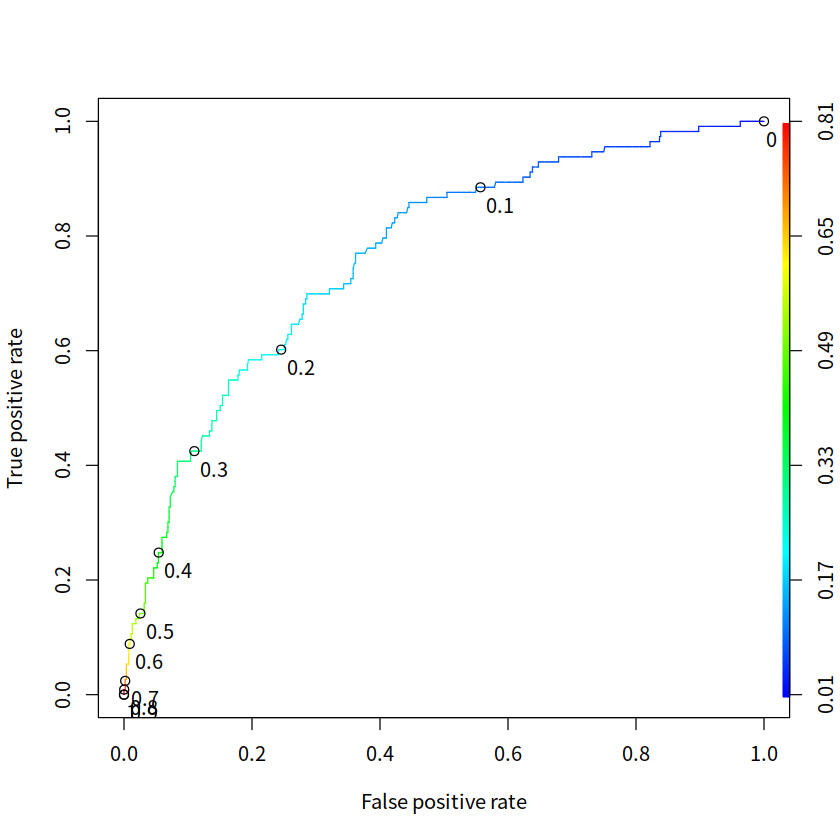

In [20]:
ROCRpred = prediction(PatoffTrain_1, MyTrain$Playoffs)
ROCRperf = performance(ROCRpred, "tpr", "fpr")
plot(ROCRperf, colorize = TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj = c(-0.2,1.7))

计算AUC

In [21]:
ROCRauc = performance(ROCRpred, "auc")
ROCRauc@y.values

[[1]]
[1] 0.7659957

Setting levels: control = 0, case = 1

Setting direction: controls < cases



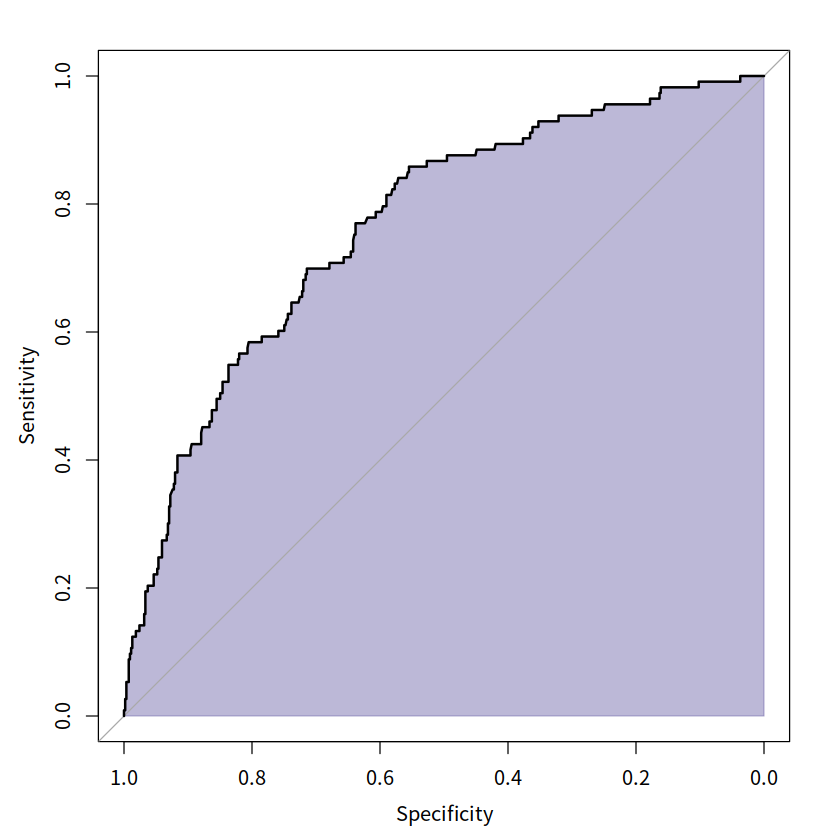

In [22]:
plot.roc(MyTrain$Playoffs, PatoffTrain_1, 
    auc.polygon = TRUE, 
    auc.polygon.col=rgb(.35,0.31,0.61, alpha = 0.4), 
    auc.polygon.border=rgb(.35,0.31,0.61, 0.4))

### 测试集验证

In [23]:
predictTest = predict(QualityLog, type = "response", newdata = MyTest)
conf03out = table(MyTest$Playoffs, predictTest > 0.5)
conf03out

   
    FALSE TRUE
  0   224    7
  1    39   10

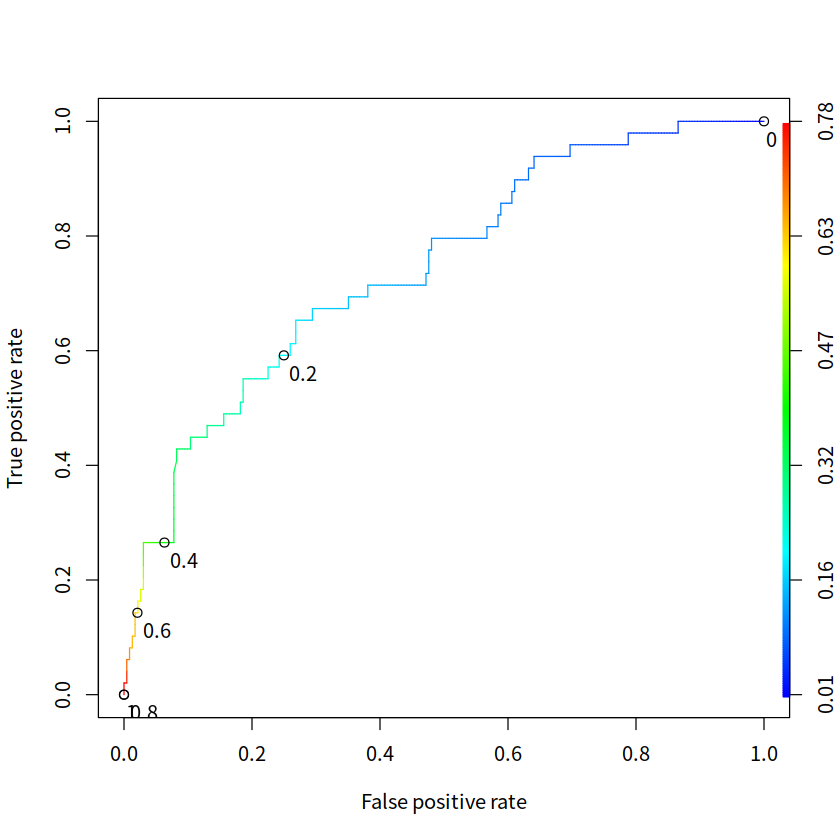

In [24]:
ROCRpredTest = prediction(predictTest, MyTest$Playoffs)
ROCRperfTest = performance(ROCRpredTest, "tpr", "fpr")
plot(ROCRperfTest, colorize = TRUE, print.cutoffs.at = seq(0,1,0.2), text.adj = c(-0.2,1.7))

####  预测

In [25]:
predictTest = predict(QualityLog, type = "response", newdata = Testraw)

In [26]:
x <-data.frame(Id=Testraw$Id,Playoffs=predictTest)
x$Playoffs[which(x$Playoffs<0.43)]=0
x$Playoffs[which(x$Playoffs>0.43)]=1

输出数据

In [27]:
write.csv(x,"../../output/O_S_output.csv",row.names=FALSE)

## SVM

In [28]:
Trainraw

Id,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
301,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3,1,162,0.314,0.392
302,ARI,NL,2002,819,674,98,0.346,0.423,0.267,1,4,4,162,0.305,0.397
303,ATL,NL,2002,708,565,101,0.331,0.409,0.260,1,2,4,161,0.313,0.364
304,BAL,AL,2002,667,773,67,0.309,0.403,0.246,0,NA,NA,162,0.336,0.435
305,BOS,AL,2002,859,665,93,0.345,0.444,0.277,0,NA,NA,162,0.308,0.385
306,CHC,NL,2002,706,759,67,0.321,0.413,0.246,0,NA,NA,162,0.331,0.407
307,CHW,AL,2002,856,798,81,0.338,0.449,0.268,0,NA,NA,162,0.330,0.423
308,CIN,NL,2002,709,774,78,0.330,0.408,0.253,0,NA,NA,162,0.338,0.426
309,CLE,AL,2002,739,837,74,0.321,0.412,0.249,0,NA,NA,162,0.348,0.423


In [29]:
MyTrain$Playoffs[which(MyTrain$Playoffs==0)]=-1
MyTrain$Playoffs=as.factor(MyTrain$Playoffs)
MyTest$Playoffs[which(MyTest$Playoffs==0)]=-1
MyTrain

,Id,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
1,301,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3,1,162,0.314,0.392
2,302,ARI,NL,2002,819,674,98,0.346,0.423,0.267,1,4,4,162,0.305,0.397
3,303,ATL,NL,2002,708,565,101,0.331,0.409,0.260,1,2,4,161,0.313,0.364
4,304,BAL,AL,2002,667,773,67,0.309,0.403,0.246,-1,NA,NA,162,0.336,0.435
5,305,BOS,AL,2002,859,665,93,0.345,0.444,0.277,-1,NA,NA,162,0.308,0.385
8,308,CIN,NL,2002,709,774,78,0.330,0.408,0.253,-1,NA,NA,162,0.338,0.426
9,309,CLE,AL,2002,739,837,74,0.321,0.412,0.249,-1,NA,NA,162,0.348,0.423
10,310,COL,NL,2002,778,898,73,0.337,0.423,0.274,-1,NA,NA,162,0.349,0.466
11,311,DET,AL,2002,575,864,55,0.300,0.379,0.248,-1,NA,NA,161,0.343,0.455


In [31]:
SVM_Train_1=MyTrain[,c(8,9,10,11,14)]
svmfit=svm(Playoffs ~OBP+ SLG+BA+G, data=SVM_Train_1, kernel="linear", cost=1)
svmtest_1=MyTest[,c(8,9,10,11,14)]
predictTest = predict(svmfit, type = "response", newdata = svmtest_1)
conf2=table(svmtest_1$Playoffs, predictTest)
conf2

    predictTest
      -1   1
  -1 231   0
  1   49   0

In [33]:
SVM_Train_2=MyTrain[,c(8,9,10,11)]
svmfit=svm(Playoffs ~OBP+ SLG+BA, data=SVM_Train_1, kernel="linear", cost=1)
svmtest_2=MyTest[,c(8,9,10,11)]
predictTest = predict(svmfit, type = "response", newdata = svmtest_2)
conf2=table(svmtest_2$Playoffs, predictTest)
conf2

    predictTest
      -1   1
  -1 231   0
  1   49   0

调参优化

In [34]:
set.seed(3214)
tune.out=tune(svm,Playoffs ~G +OBP +SLG +BA , data=SVM_Train_1, scale=TRUE, ranges=list(kernel=c("radial","polynomial","sigmoid"),cost=c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),gamma=c(0.025,0.05,0.075,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1,1.2)))
bestmodSVM=tune.out$best.model
summary(bestmodSVM)


Call:
best.tune(method = svm, train.x = Playoffs ~ G + OBP + SLG + BA, 
    data = SVM_Train_1, ranges = list(kernel = c("radial", "polynomial", 
        "sigmoid"), cost = c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 
        0.9, 1), gamma = c(0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.5, 
        0.6, 0.7, 0.8, 0.9, 1, 1.2)), scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.8 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  229

 ( 112 117 )


Number of Classes:  2 

Levels: 
 -1 1




检验最优SVM的预测精度：

In [35]:
PredictSVM2 = predict(bestmodSVM,type="response")
confsvm2 = table(SVM_Train_1$Playoffs,PredictSVM2)
accuracySvm2= (confsvm2[1,1]+confsvm2[2,2])/sum(confsvm2) *100
accuracySvm2

[1] 83.43558

检测样本外精度

In [36]:
PredictSVM2 = predict(bestmodSVM,type="response",newdata=svmtest_1)
confsvm2 = table(svmtest_1$Playoffs,PredictSVM2)
accuracySvm2= (confsvm2[1,1]+confsvm2[2,2])/sum(confsvm2) *100
accuracySvm2

[1] 83.92857

## 使用树模型
### 构建cart模型

In [68]:
tree_train=MyTrain
tree_test=MyTest
tree_train$Playoffs=as.factor(tree_train$Playoffs)
tree_test$Playoffs=as.factor(tree_test$Playoffs)
tree_test

,Id,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
6,306,CHC,NL,2002,706,759,67,0.321,0.413,0.246,-1,NA,NA,162,0.331,0.407
7,307,CHW,AL,2002,856,798,81,0.338,0.449,0.268,-1,NA,NA,162,0.330,0.423
13,313,HOU,NL,2002,749,695,84,0.338,0.417,0.262,-1,NA,NA,162,0.330,0.410
18,318,MON,NL,2002,735,718,83,0.334,0.418,0.261,-1,NA,NA,162,0.329,0.421
24,324,SDP,NL,2002,662,815,66,0.321,0.381,0.253,-1,NA,NA,162,0.346,0.442
25,325,SEA,AL,2002,814,699,93,0.350,0.419,0.275,-1,NA,NA,162,0.315,0.410
34,334,BAL,AL,2001,687,829,63,0.319,0.380,0.248,-1,NA,NA,162,0.337,0.439
37,337,CHW,AL,2001,798,795,83,0.334,0.451,0.268,-1,NA,NA,162,0.334,0.427
38,338,CIN,NL,2001,735,850,66,0.324,0.419,0.262,-1,NA,NA,162,0.341,0.455


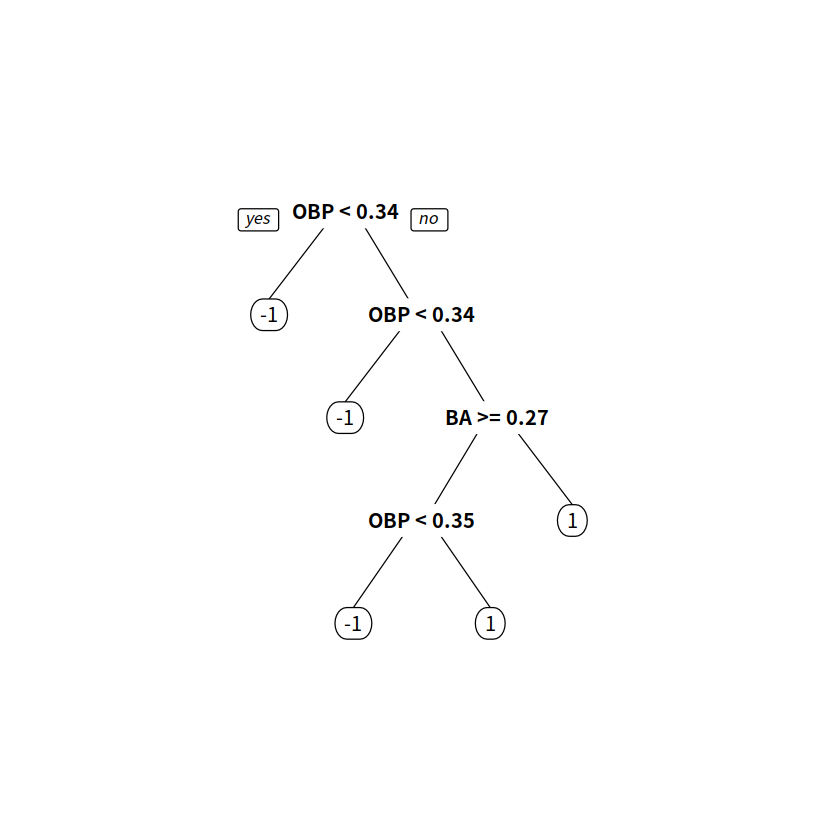

In [70]:
moneyTree = rpart(Playoffs ~ OBP + SLG + BA + G , data = tree_train, control = rpart.control(minbucket = 10))
prp(moneyTree)

评估cart模型的准确性

In [71]:
predictCART = predict(moneyTree, newdata = tree_test,type = "class")
conf = table(tree_test$Playoffs, predictCART)
conf

    predictCART
      -1   1
  -1 221  10
  1   34  15

### 使用交叉验证选择复杂度参数
现在，我们将定义我们的交叉验证实验。首先，我们定义所需的折数。

In [166]:
fitControl = trainControl(method = "cv", number = 50)

接下来，我们需要为参数cp选择可能的值。cp通过惩罚每个拆分来控制树的增长。

cp越大（每次拆分的惩罚越高），导致树越小：cp = 1将导致没有拆分的树，即最小的树；相当于设置minbucket =数据大小 ;

较小的cp（每次拆分的惩罚较低）会导致树的增大：cp = 0将导致以每个数据点为叶节点的树，即最大的树；等效于设置minbucket = 1。

通常，我们不需要探究cp值从0到1 的整个范围。在大多数情况下，我们只需要一个小的cp值即可，例如从0.01到0.5，步长为0.01。

In [167]:
cpGrid = expand.grid(.cp = (1:500)*0.001)

In [168]:
set.seed(33)
cvResults = train(Playoffs ~ OBP + SLG + BA, data = tree_train, method = "rpart", trControl = fitControl, tuneGrid = cpGrid)
cvResults

CART 

652 samples
  3 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (50 fold) 
Summary of sample sizes: 640, 639, 640, 639, 638, 639, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa       
  0.001  0.8257875   0.259757695
  0.002  0.8257875   0.256718734
  0.003  0.8305128   0.261084801
  0.004  0.8320513   0.263370516
  0.005  0.8410623   0.280864129
  0.006  0.8459341   0.291262928
  0.007  0.8459341   0.291262928
  0.008  0.8459341   0.288740017
  0.009  0.8459341   0.288740017
  0.010  0.8426190   0.270172795
  0.011  0.8426190   0.270172795
  0.012  0.8426190   0.270172795
  0.013  0.8426190   0.270172795
  0.014  0.8410806   0.257601366
  0.015  0.8410806   0.257601366
  0.016  0.8427473   0.262101366
  0.017  0.8427473   0.262101366
  0.018  0.8427473   0.262101366
  0.019  0.8337363   0.200684460
  0.020  0.8337363   0.200684460
  0.021  0.8337363   0.200684460
  0.022  0.8337363   0.200684460
  0.023  0.8337363  

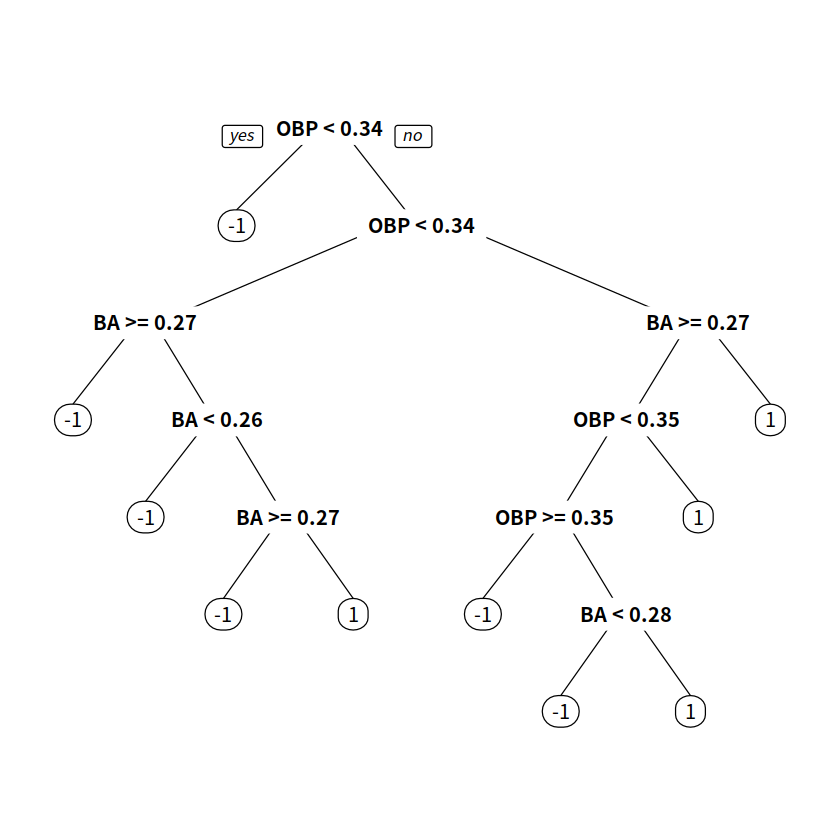

In [169]:
moneyTreeCV = rpart(Playoffs ~ OBP + SLG + BA, data = tree_train, control = rpart.control(cp = cvResults["bestTune"]))
prp(moneyTreeCV)

测试预测集合

In [170]:
predictCV = predict(moneyTreeCV, newdata = tree_test, type = "class")
confCV = table(tree_test$Playoffs, predictCV)
confCV

    predictCV
      -1   1
  -1 214  17
  1   33  16

预测数据

In [164]:
predictTest=predict(moneyTreeCV,newdata = Testraw, type = "class")
x <-data.frame(Id=Testraw$Id,Playoffs=predictTest)
x$Playoffs=as.numeric(x$Playoffs)
x$Playoffs[which(x$Playoffs==1)]=0
x$Playoffs[which(x$Playoffs==2)]=1
x

,Id,Playoffs
,<int>,<dbl>
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [165]:
write.csv(x,"../../output/Cart_tree_output.csv",row.names=FALSE)

### 建立随机森林模型

In [149]:
set.seed(333)
moneyForest = randomForest(Playoffs ~ OBP + SLG + BA, data = tree_train, ntree = 3000, nodesize = 50, mtry = 3)

In [150]:
predictForest = predict(moneyForest, newdata = tree_test)
confRF = table(tree_test$Playoffs,predictForest)
confRF

    predictForest
      -1   1
  -1 221  10
  1   34  15